In [12]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('../data/processed/cleaned-products.csv', encoding='ISO-8859-1')

print(df)

                SKU                                        Description  \
0      4DM73487622R  Smith - 4D MAG Goggle - Connor Ryan Storm Blue...   
1            541745                Stans - Tubless Tire Sealant - 16oz   
2            541745                Stans - Tubless Tire Sealant - 16oz   
3      ADU23584956L   Screamer - Neckwarmer - Charcoal/Sunlight - OSFA   
4      ANI11300719M             Black Crows - Anima 115 Skis - 189.2cm   
...             ...                                                ...   
39774        440534                    Incredibell Adjustabell 2 black   
39775       5258695     Fx 3 Disc M Alpine Blue To Deep Dark Blue Fade   
39776       5269176    Kickstand Bontrager integrated alloy rear mount   
39777        564879       Saddle Bontrager boulevard fluid 225mm black   
39778  CAG38650395K       Cage Trek Elite Ocean Recycled Plastic Black   

                                            Category  \
0              Clothing - Winter - Eyewear - Goggles   

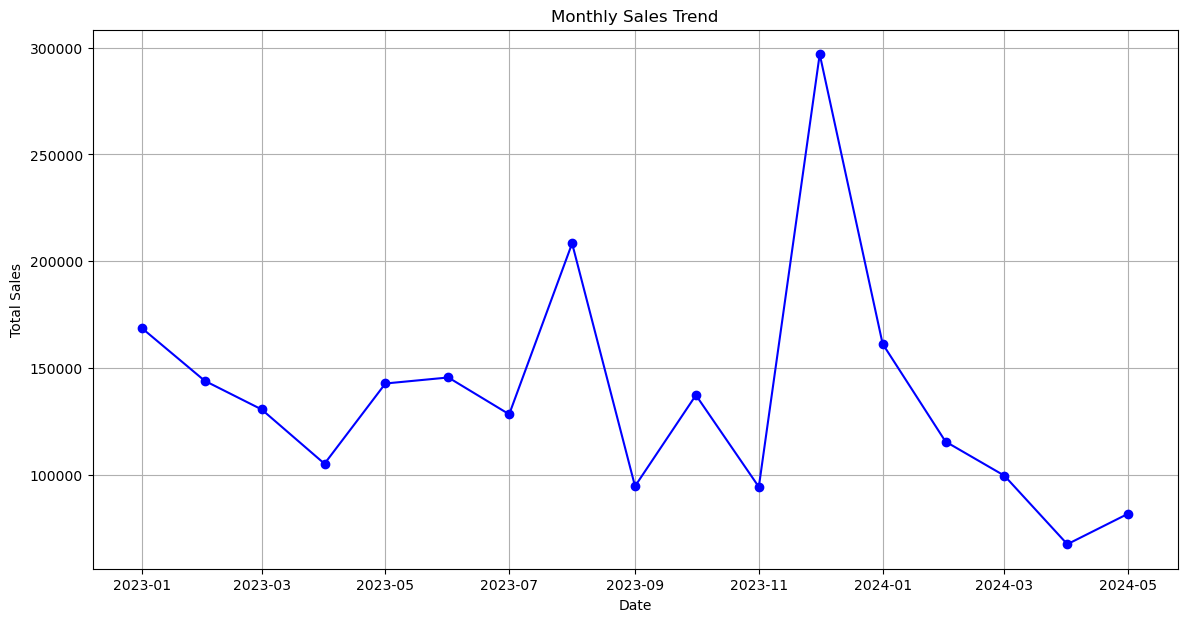

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Aggregate sales by month
monthly_sales = df.groupby(df['SaleDate'].dt.to_period('M')).agg({'Total': 'sum'}).reset_index()
monthly_sales['SaleDate'] = monthly_sales['SaleDate'].dt.to_timestamp()

# Plot sales trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['SaleDate'], monthly_sales['Total'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


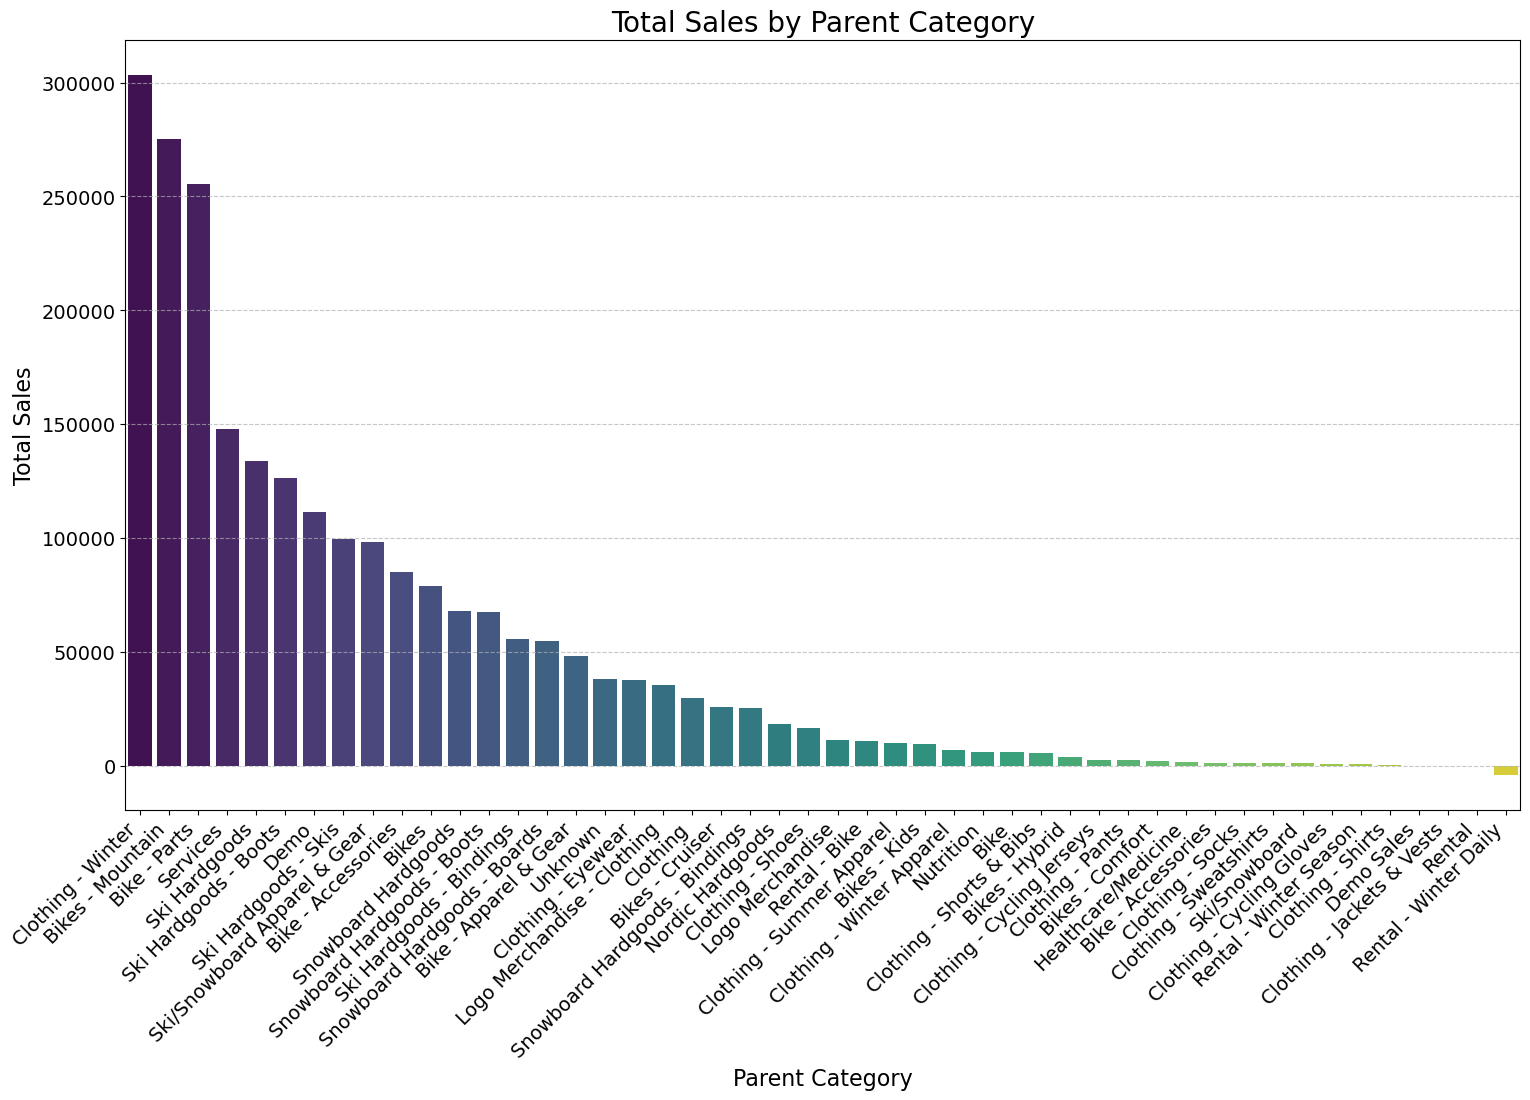

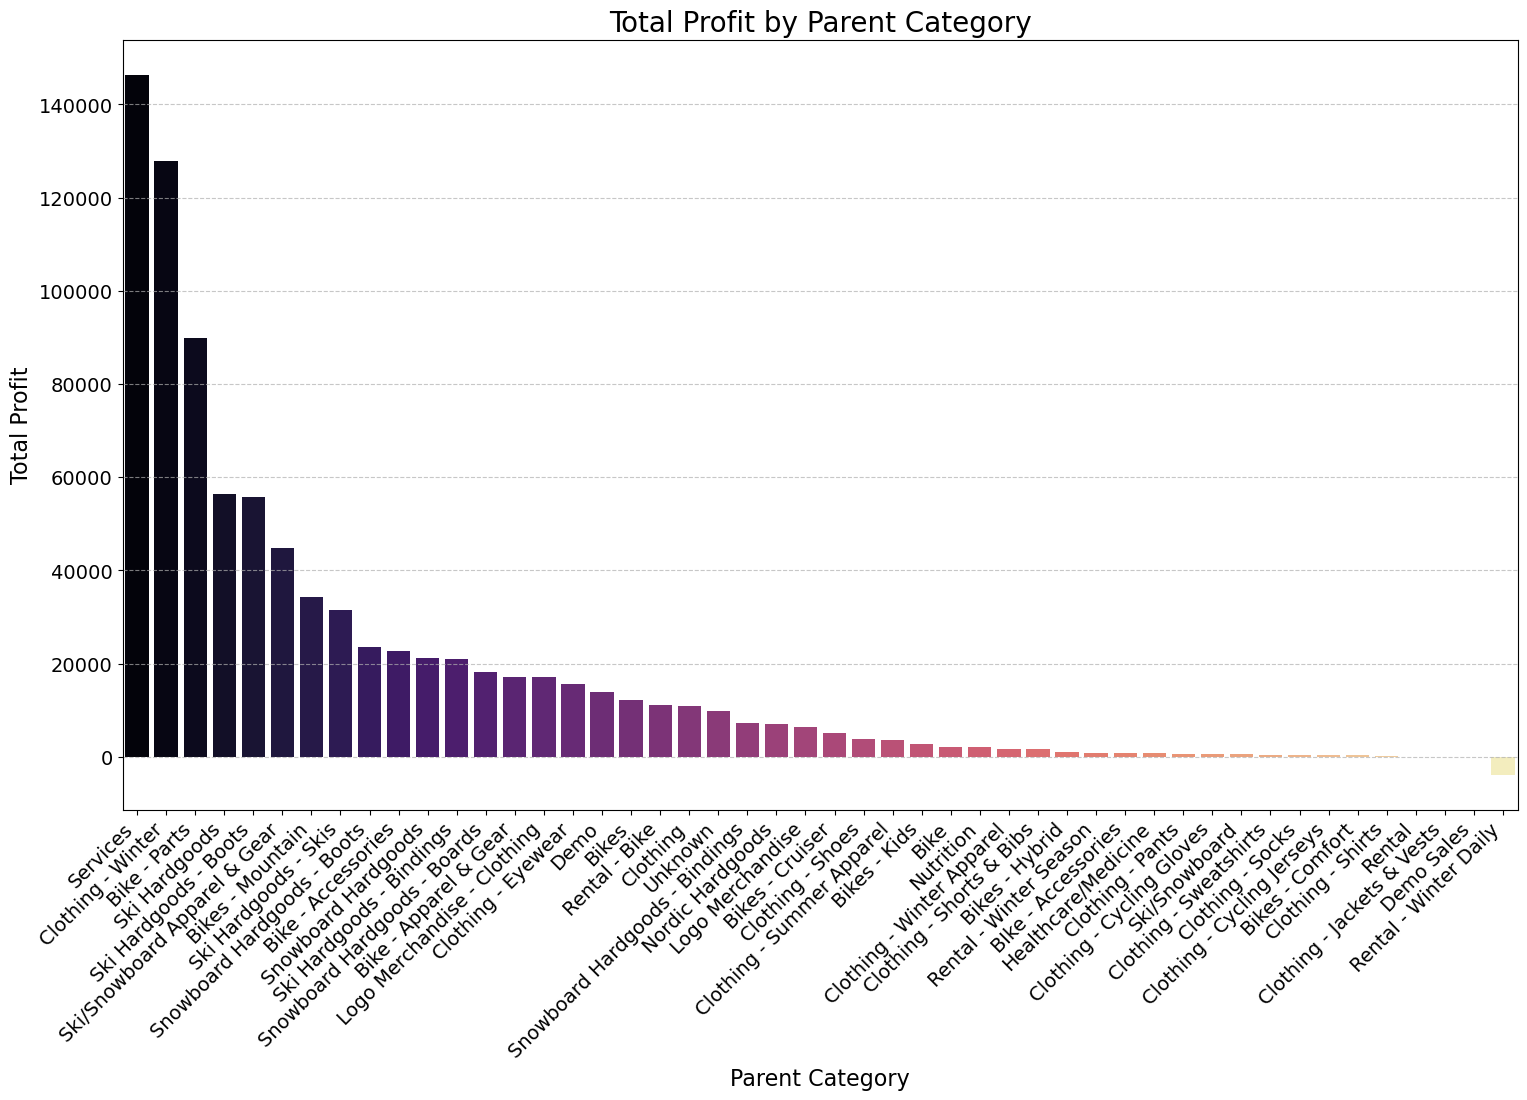

In [18]:
# Function to extract ParentCategory with NaN handling
def extract_parent_category(category):
    if pd.isna(category):
        return "Unknown"
    parts = category.split(" - ")
    if len(parts) >= 3:
        return " - ".join(parts[:2])
    else:
        return parts[0]

# Apply function to create ParentCategory
df['ParentCategory'] = df['Category'].apply(extract_parent_category)

# Aggregate sales by ParentCategory
parent_category_sales = df.groupby('ParentCategory').agg({'Total': 'sum'}).reset_index()
parent_category_profit = df.groupby('ParentCategory').agg({'Profit': 'sum'}).reset_index()

# Sort by total sales and profit in descending order
parent_category_sales = parent_category_sales.sort_values(by='Total', ascending=False)
parent_category_profit = parent_category_profit.sort_values(by='Profit', ascending=False)

# Plot total sales by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='Total', 
    x='ParentCategory', 
    data=parent_category_sales, 
    palette='viridis'
)
plt.title('Total Sales by Parent Category', fontsize=20)
plt.ylabel('Total Sales', fontsize=16)
plt.xlabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot profit by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='Profit', 
    x='ParentCategory', 
    data=parent_category_profit, 
    palette='magma'
)
plt.title('Total Profit by Parent Category', fontsize=20)
plt.ylabel('Total Profit', fontsize=16)
plt.xlabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

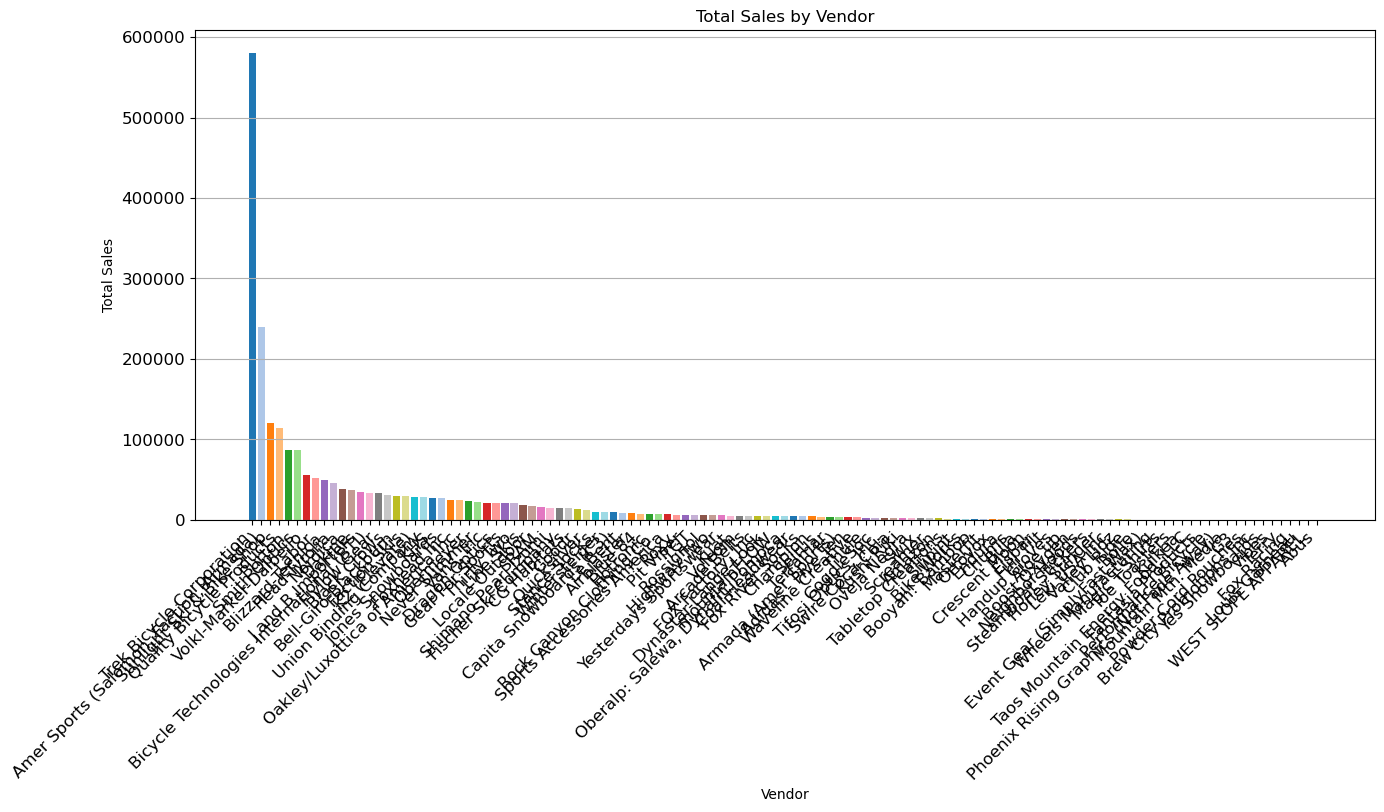

In [25]:
# Aggregate sales by vendor
vendor_sales = df.groupby('Vendor').agg({'Total': 'sum'}).reset_index()

# Filter vendors with total sales >= 20
vendor_sales_filtered = vendor_sales[vendor_sales['Total'] >= 20]

# Sort the values by total sales in descending order
vendor_sales_sorted = vendor_sales_filtered.sort_values(by='Total', ascending=False)

# Plot vendor sales
plt.figure(figsize=(14, 7))
bars = plt.bar(vendor_sales_sorted['Vendor'], vendor_sales_sorted['Total'], width=0.8, color=plt.cm.tab20.colors)

plt.title('Total Sales by Vendor')
plt.ylabel('Total Sales')
plt.xlabel('Vendor')
plt.grid(True, axis='y')

# Improve the readability of the labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Add spacing at the bottom for x-axis labels

plt.show()


In [28]:
# Aggregate sales by vendor
vendor_sales = df.groupby('Vendor').agg({'Total': 'sum'}).reset_index()

# Print out the counts for each vendor
print("Counts for each vendor:")
print(vendor_sales)



Counts for each vendor:
                    Vendor    Total
0                     Abus    24.90
1        Adidas - Five Ten  3498.26
2               Airblaster  8149.55
3                  Aloe up   716.53
4                   Amazon  1847.29
..                     ...      ...
115   Wheels Manufacturing   316.29
116          Wintersteiger  9202.98
117         Yes Snowboards    89.86
118  Yesterdays Sportswear  5538.66
119           mountainFLOW  4386.72

[120 rows x 2 columns]


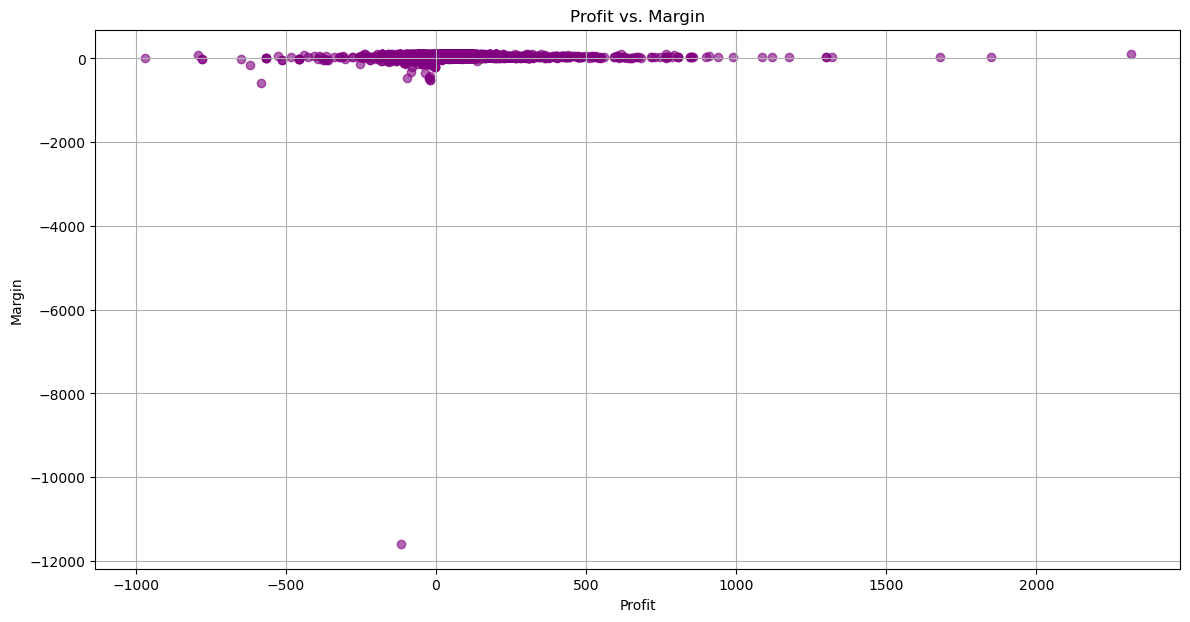

In [26]:
# Plot profit vs. margin
plt.figure(figsize=(14, 7))
plt.scatter(df['Profit'], df['Margin'], alpha=0.6, color='purple')
plt.title('Profit vs. Margin')
plt.xlabel('Profit')
plt.ylabel('Margin')
plt.grid(True)
plt.show()

Profit Summary Statistics:
count    39779.000000
mean        21.321336
std         56.923446
min       -970.000000
25%          2.460000
50%          9.400000
75%         22.955000
max       2315.000000
Name: Profit, dtype: float64

Margin Summary Statistics:
count    39779.000000
mean        45.633843
std         65.096791
min     -11600.000000
25%         29.070000
50%         46.010000
75%         59.110000
max        100.000000
Name: Margin, dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


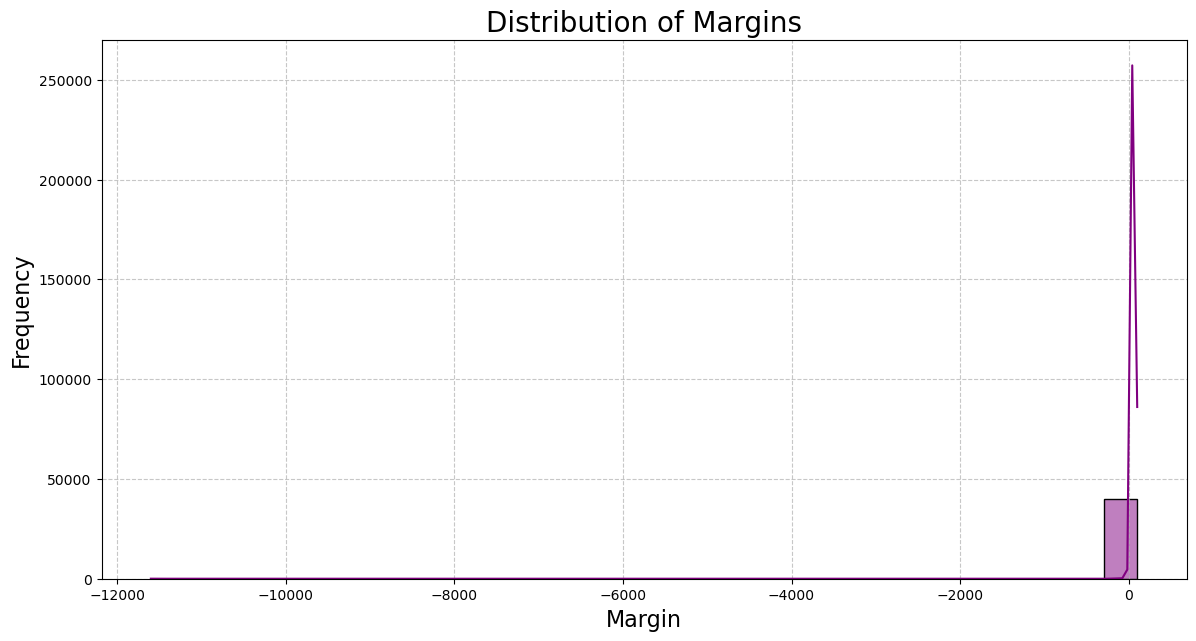

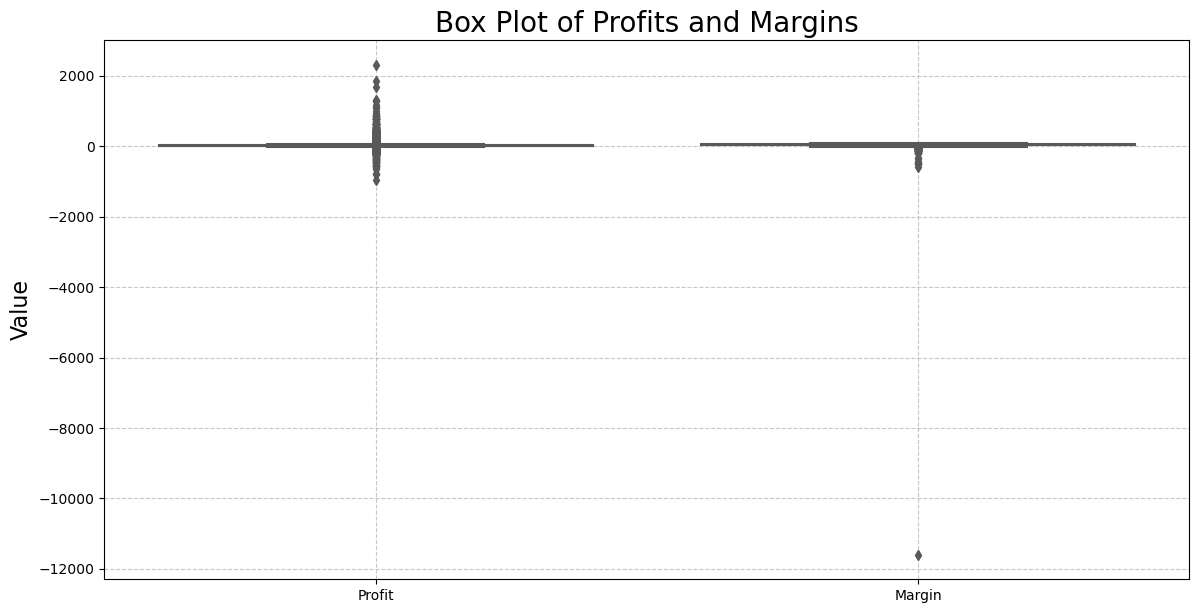

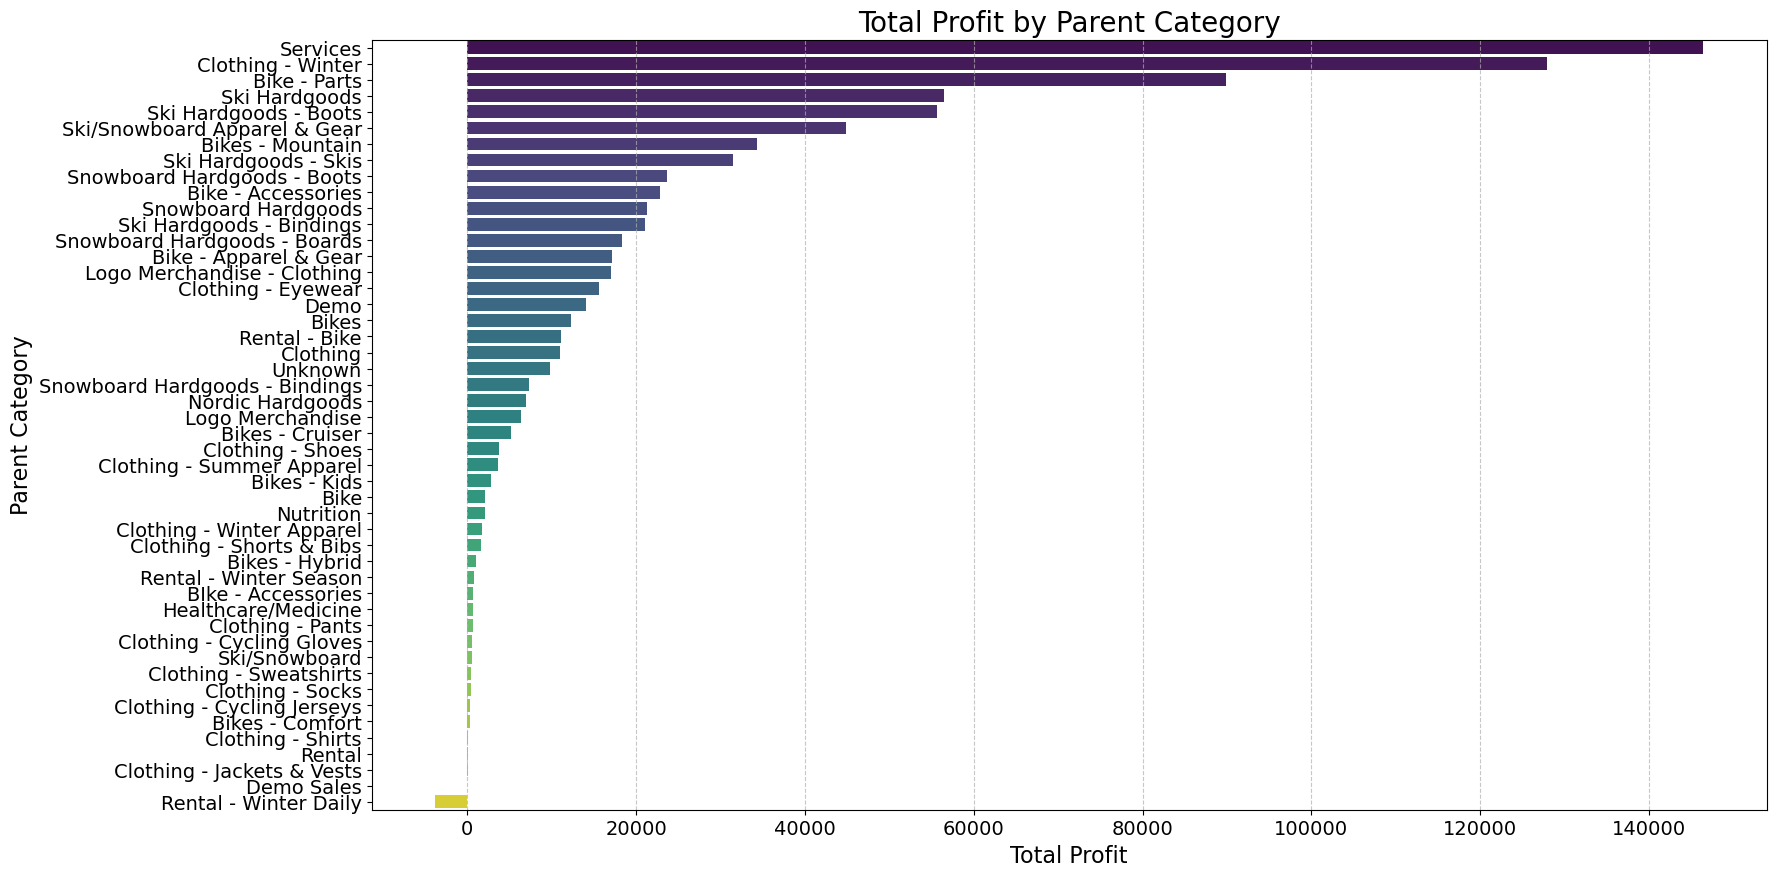

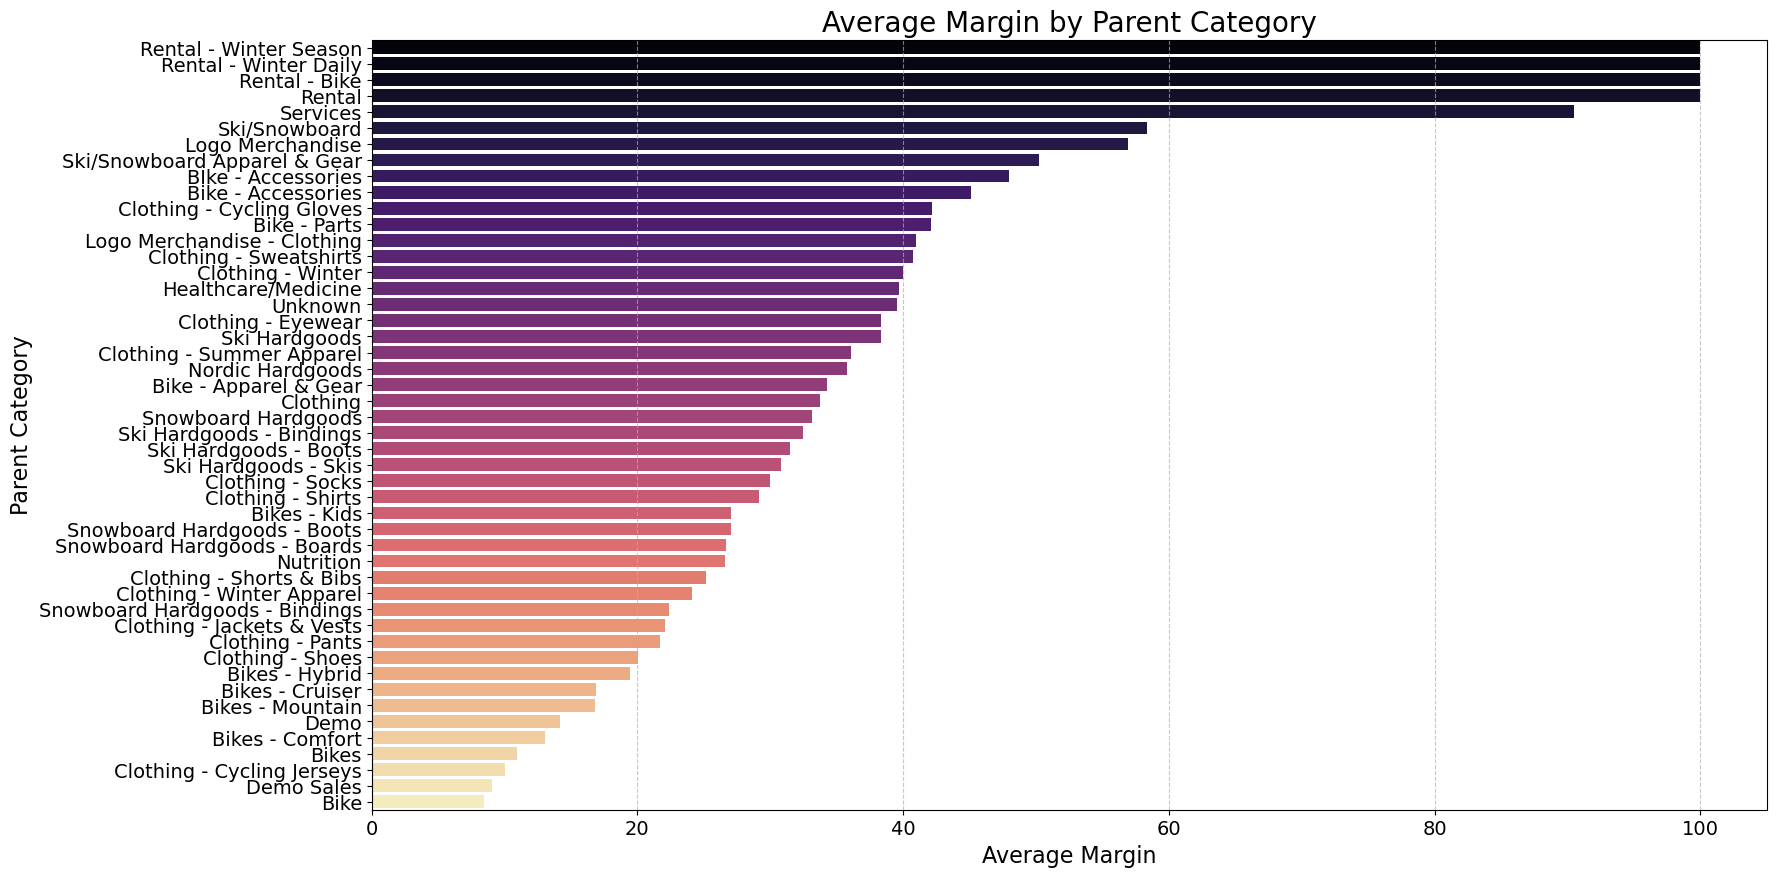

In [30]:
# Function to extract ParentCategory with NaN handling
def extract_parent_category(category):
    if pd.isna(category):
        return "Unknown"
    parts = category.split(" - ")
    if len(parts) >= 3:
        return " - ".join(parts[:2])
    else:
        return parts[0]

# Apply function to create ParentCategory
df['ParentCategory'] = df['Category'].apply(extract_parent_category)

# Summary statistics
profit_summary = df['Profit'].describe()
margin_summary = df['Margin'].describe()

print("Profit Summary Statistics:")
print(profit_summary)
print("\nMargin Summary Statistics:")
print(margin_summary)

# Histogram of Margins
plt.figure(figsize=(14, 7))
sns.histplot(df['Margin'], bins=30, kde=True, color='purple')
plt.title('Distribution of Margins', fontsize=20)
plt.xlabel('Margin', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Box Plot of Profits and Margins
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['Profit', 'Margin']], palette='Set2')
plt.title('Box Plot of Profits and Margins', fontsize=20)
plt.ylabel('Value', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Aggregate profit by ParentCategory
parent_category_profit = df.groupby('ParentCategory').agg({'Profit': 'sum'}).reset_index()
parent_category_margin = df.groupby('ParentCategory').agg({'Margin': 'mean'}).reset_index()

# Sort by total profit and average margin in descending order
parent_category_profit = parent_category_profit.sort_values(by='Profit', ascending=False)
parent_category_margin = parent_category_margin.sort_values(by='Margin', ascending=False)

# Plot profit by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='ParentCategory', 
    x='Profit', 
    data=parent_category_profit, 
    palette='viridis'
)
plt.title('Total Profit by Parent Category', fontsize=20)
plt.xlabel('Total Profit', fontsize=16)
plt.ylabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot margin by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='ParentCategory', 
    x='Margin', 
    data=parent_category_margin, 
    palette='magma'
)
plt.title('Average Margin by Parent Category', fontsize=20)
plt.xlabel('Average Margin', fontsize=16)
plt.ylabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

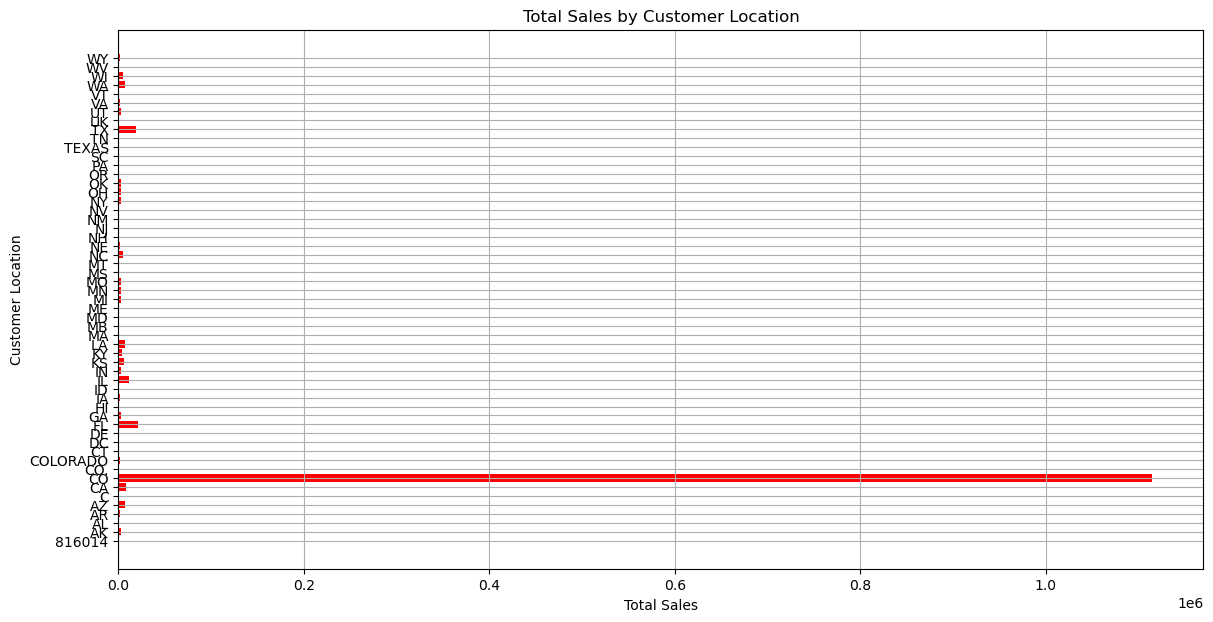

In [27]:
# Aggregate sales by customer location
location_sales = df.groupby('CustomerLocation').agg({'Total': 'sum'}).reset_index()

# Plot location sales
plt.figure(figsize=(14, 7))
plt.barh(location_sales['CustomerLocation'], location_sales['Total'], color='red')
plt.title('Total Sales by Customer Location')
plt.xlabel('Total Sales')
plt.ylabel('Customer Location')
plt.grid(True)
plt.show()

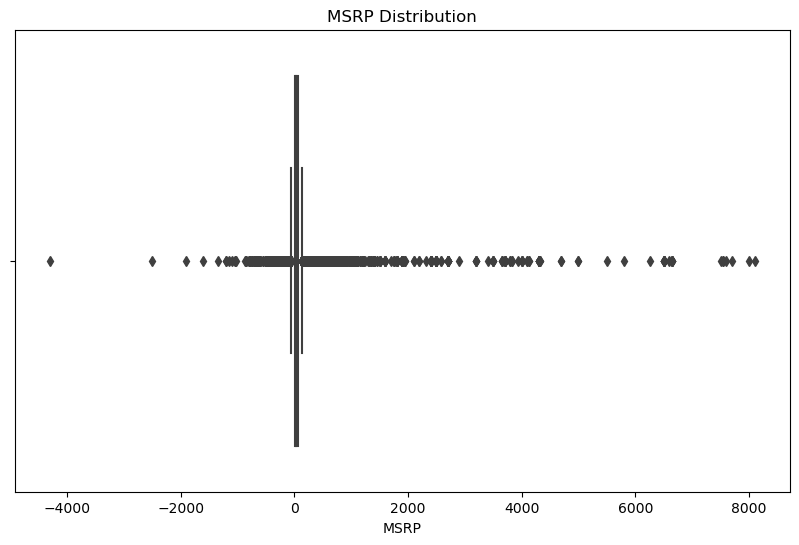

In [36]:
# Plot MSRP Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MSRP')
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.savefig('../references/msrp_distribution.png')
plt.show()

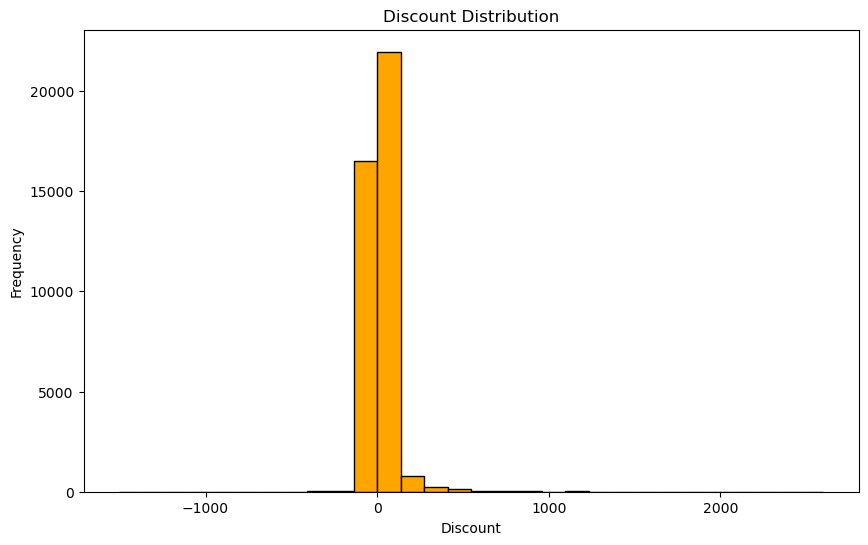

In [38]:
# Discount Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Discount'], bins=30, edgecolor='k', color='orange')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.savefig('../references/discount_distribution.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../reference/category_vs_msrp.png'

<Figure size 1000x600 with 0 Axes>

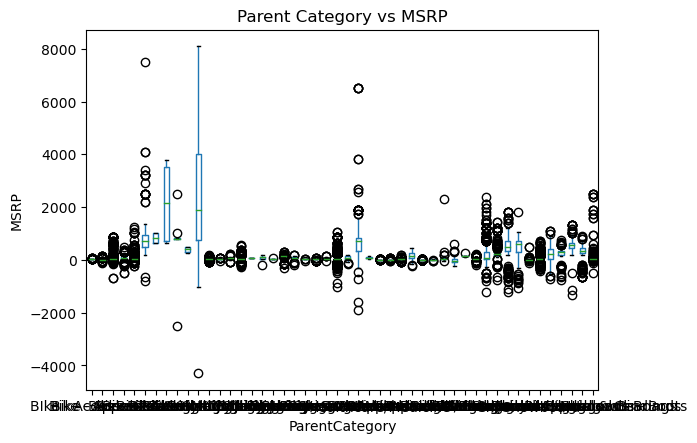

In [42]:


# Category vs MSRP
plt.figure(figsize=(10, 6))
df.boxplot(column='MSRP', by='ParentCategory', grid=False)
plt.title('Parent Category vs MSRP')
plt.suptitle('')
plt.xlabel('ParentCategory')
plt.ylabel('MSRP')
plt.savefig('../reference/category_vs_msrp.png')
plt.show()

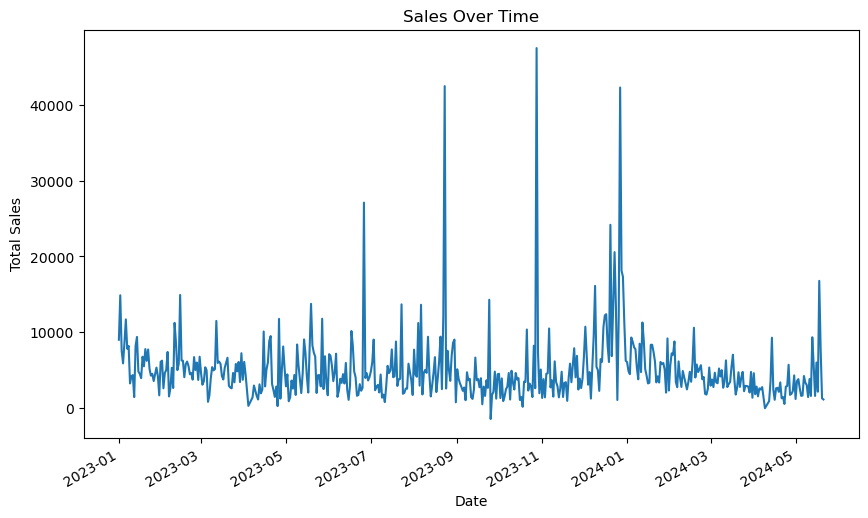

In [45]:

# Sales Over Time
plt.figure(figsize=(10, 6))
df.groupby('SaleDate')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: '../reference/sales_over_time.png'

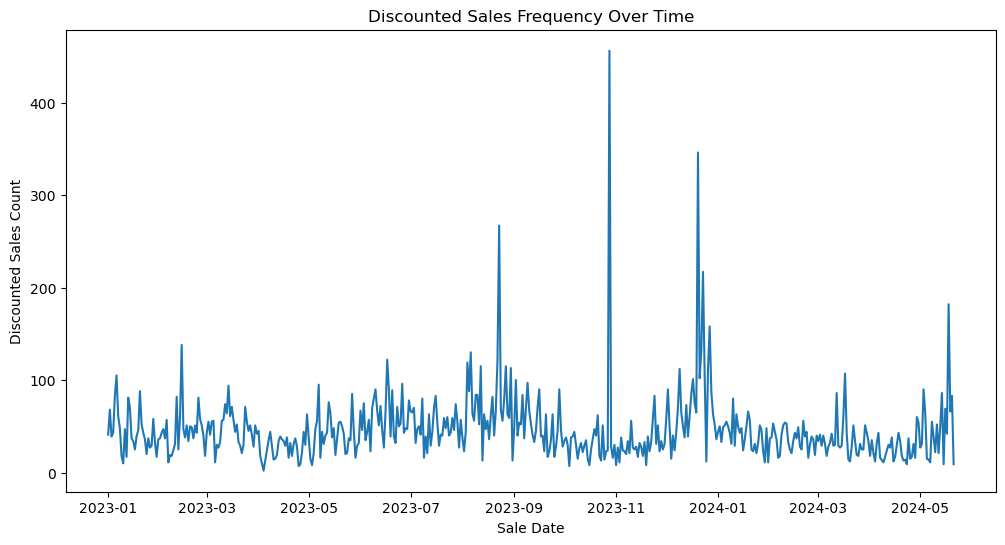

In [46]:
# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Group data by date and calculate discounted sales count
discounted_sales = df[df['Discount'] > 0].groupby('SaleDate')['Discount'].count().reset_index()

# Plot Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='SaleDate', y='Discount', data=discounted_sales)
plt.title('Discounted Sales Frequency Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Discounted Sales Count')
plt.savefig('../reference/sales_over_time.png')
plt.show()
